<h1 style="color:blue;">THE POISSON PROBABILITY DISTRIBUTION<h1>

Mylie has been averaging 3 hits for every 10 times at bat. What is the probability that she will get exactly 2 hits in her next 5 times at bat?

How do we go about calculating the probability for this outcome? (pause and think)  You guessed right!<br> It is a Poisson probability problem.<br>Let us get started.


The Poisson Probability Distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.
The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume.

<h2>Probability mass function</h2>

The Poisson distribution is popular for modeling the number of times an event occurs in an interval of time or space.

A discrete random variable X  is said to have a Poisson distribution with parameter $\mu$ > 0, if, for k = 0, 1, 2, ..., the probability mass function of X  is given by:

<p style="font:20px navy;text-align:center;">f(k;$\mu$)=P(X=k)= e<sup>-$\mu$</sup>$\mu$<sup>k</sup> / k!</p>

where

e is Euler's number (e = 2.71828...)
k! is the factorial of k.
The positive real number $\mu$ is equal to the expected value of X and also to its variance

<p style="font:20px navy;text-align:center;">$\mu$ =E(X)= $\sigma$<sup>2</sup></p>

The Poisson distribution can be applied to systems with a large number of possible events, each of which is rare. The number of such events that occur during a fixed time interval is, under the right circumstances, a random number with a Poisson distribution.

<h2>Assumptions and validity</h2>

The Poisson distribution is an appropriate model if the following assumptions are true:

1. k is the number of times an event occurs in an interval and k can take values 0, 1, 2, ....

2. The occurrence of one event does not affect the probability that a second event will occur. That is, events occur independently.

3. The average rate at which events occur is constant.

4. Two events cannot occur at exactly the same instant; instead, at each very small sub-interval exactly one event either occurs or does not occur.
Or
The actual probability distribution is given by a binomial distribution and the number of trials is sufficiently bigger than the number of successes one is asking about .

If these conditions are true, then k is a Poisson random variable, and the distribution of k is a Poisson distribution.

Now let us answer the question that was asked at the beginning of the notebook.

Mylie has been averaging 3 hits for every 10 times at bat. What is the probability that she will get exactly 2 hits in her next 5 times at bat?

Since the formula is:

<p style="font:20px navy;text-align:center;">f(k;$\mu$)=P(X=k)= e<sup>-$\mu$</sup>$\mu$<sup>k</sup> / k!</p>

where 
k= 2 hits in 5 attempts
$\mu$= 3 hits in 10 attempts = 1.5 hits n 5 attempts

<p style="font:20px navy;text-align:center;" >P(X =2)= e<sup>-1.5</sup>1.5<sup>2</sup>/2! =0.2510</p>


Let us use the scipy.stats.poisson.pmf function to further driven home the concept.

In [17]:
from scipy.stats import poisson
import matplotlib.pyplot as plt


The probability mass function for poisson is:

poisson.pmf(k) = exp(-mu) * mu**k / k!
for k >= 0.

poisson takes mu as shape parameter(mu is the mean/expected value /variance).

The probability mass function above is defined in the “standardized” form. To shift distribution use the loc parameter. Specifically, poisson.pmf(k, mu, loc) is identically equivalent to poisson.pmf(k - loc, mu).

In [18]:
#Calculate a few first moments:


mu = 1.5
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
print('Mean=%.3f,Variance=%.3f'%(mean,var) )

Mean=1.500,Variance=1.500


In [19]:
#pmf(x, mu, loc=0)	Probability mass function.
#Use the Probability mass function to calculate P(X=2)
p= poisson.pmf(2,1.5)
p

0.25102143016698353

We got the same answer as above when we did it by hand.
Let us  display  the probability mass function (pmf) for k >= 0 and < 5:

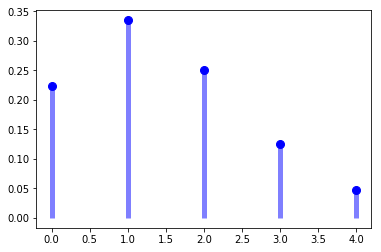

In [20]:
import numpy as np
fig, ax = plt.subplots(1, 1)
x = np.arange(0,5)
mu = 1.5
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

#Freeze the distribution and display the frozen pmf:
rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
         label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [21]:
x

array([0, 1, 2, 3, 4])

In [22]:
#Check accuracy of cdf and ppf:

prob = poisson.cdf(x, mu)
np.allclose(x, poisson.ppf(prob, mu))

True

[Text(0, 0.5, 'Probability'), Text(0.5, 0, 'X=No of Outcomes')]

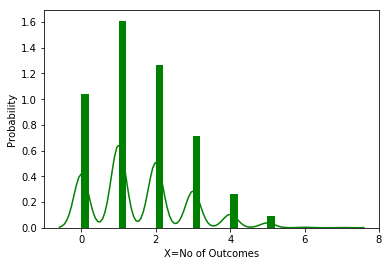

In [23]:
#Generate random numbers:
import seaborn as sb
r = poisson.rvs(mu, size=1000)
ax = sb.distplot(r,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='X=No of Outcomes', ylabel='Probability')


<h4>Methods</h4>
<pre>
rvs(mu, loc=0, size=1, random_state=None)	Random variates.
pmf(x, mu, loc=0)	Probability mass function.
logpmf(x, mu, loc=0)	Log of the probability mass function.
cdf(x, mu, loc=0)	Cumulative density function.
logcdf(x, mu, loc=0)	Log of the cumulative density function.
sf(x, mu, loc=0)	Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).
logsf(x, mu, loc=0)	Log of the survival function.
ppf(q, mu, loc=0)	Percent point function (inverse of cdf — percentiles).
isf(q, mu, loc=0)	Inverse survival function (inverse of sf).
stats(mu, loc=0, moments='mv')	Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’).
entropy(mu, loc=0)	(Differential) entropy of the RV.
expect(func, args=(mu,), loc=0, lb=None, ub=None, conditional=False)	Expected value of a function (of one argument) with respect to the distribution.
median(mu, loc=0)	Median of the distribution.
mean(mu, loc=0)	Mean of the distribution.
var(mu, loc=0)	Variance of the distribution.
std(mu, loc=0)	Standard deviation of the distribution.
interval(alpha, mu, loc=0)	Endpoints of the range that contains alpha percent of the distribution
</pre>

<h3>Examples that violate the Poisson assumptions</h3>

The number of students who arrive at the student union per minute will likely not follow a Poisson distribution, because the rate is not constant (low rate during class time, high rate between class times) and the arrivals of individual students are not independent (students tend to come in groups).

The number of magnitude 5 earthquakes per year in a country may not follow a Poisson distribution if one large earthquake increases the probability of aftershocks of similar magnitude.

Among patients admitted to the intensive care unit of a hospital, the number of days that the patients spend in the ICU is not Poisson distributed because the number of days cannot be zero. The distribution may be modeled using a Zero-truncated Poisson distribution.

Count distributions in which the number of intervals with zero events is higher than predicted by a Poisson model may be modeled using a Zero-inflated model.



<h2> References</h2>

1. Haight, Frank A. (1967), Handbook of the Poisson Distribution, New York, NY, USA: John Wiley & Sons, ISBN 978-0-471-33932-8
2. Koehrsen, William (2019-01-20), The Poisson Distribution and Poisson Process Explained, Towards Data Science, retrieved 2019-09-19
3. Scipy stats